In [1]:
import numpy as np
import pandas as pd

# Load data and attribute names

In [2]:
columns_file = open('./UCI HAR Dataset/features.txt', "r")
content = columns_file.read()
columns = content.split('\n')

x_train = pd.read_fwf('./UCI HAR Dataset/train/X_train.txt', header=None)
x_train.columns = columns
y_train = pd.read_csv('./UCI HAR Dataset/train/Y_train.txt', sep="\n", header=None)

x_test = pd.read_fwf('./UCI HAR Dataset/test/X_test.txt', header=None)
x_test.columns = columns
y_test = pd.read_csv('./UCI HAR Dataset/test/Y_test.txt', sep="\n", header=None)

print('Columns: ', len(columns))
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

Columns:  561
x_train:  (7352, 561)
y_train:  (7352, 1)
x_test:  (2947, 561)
y_test:  (2947, 1)


The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ.
# Exploer data

In [3]:
x_train.describe()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD7B4D8400>]],
      dtype=object)

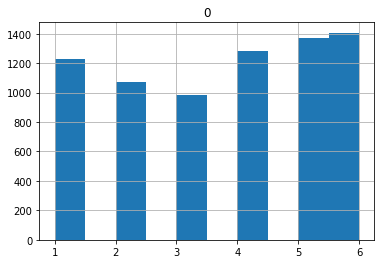

In [4]:
y_train.hist()

In [5]:
x_train.describe()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6F88A278>]],
      dtype=object)

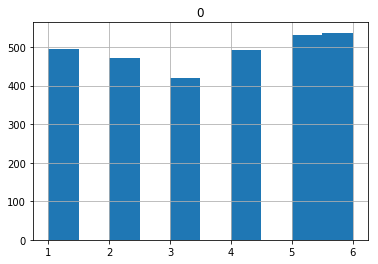

In [6]:
y_test.hist()

In [7]:
print('We have {} NaN/Null values in x train'.format(x_train.isnull().values.sum()))
print('We have {} NaN/Null values in y train'.format(y_train.isnull().values.sum()))
print('We have {} NaN/Null values in x test'.format(x_test.isnull().values.sum()))
print('We have {} NaN/Null values in y test'.format(y_test.isnull().values.sum()))

We have 0 NaN/Null values in x train
We have 0 NaN/Null values in y train
We have 0 NaN/Null values in x test
We have 0 NaN/Null values in y test


In [8]:
print('No of duplicates in x train: {}'.format(sum(x_train.duplicated())))
print('No of duplicates in y test : {}'.format(sum(x_test.duplicated())))

No of duplicates in x train: 0
No of duplicates in y test : 0


We can see that the dataset is without duplicates and Nan values.
After analysis, we see that there is no outliers this is probably because this data set was made as research dataset.
There are few, but we want to keep them so we have some real-life noise, so our model can be more robust.
(later proven at clustering)
# Correlation Analysis

In [9]:
# We can now analyse correlations between variables
# There is over 651 attributes so heat map will not be usefull
#Calculate the correlation values
correlated_values = x_train.corr()
#stack the data and convert to a dataframe

correlated_values = (correlated_values.stack().to_frame().reset_index()
                     .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
# We can see top correlations(excluding 1.000000 values)
correlated_values = correlated_values[correlated_values['abs_correlation'] != 1.0]
correlated_values.sort_values(by=['abs_correlation'], ascending=False)[6:]

,Feature_1,Feature_2,Correlations,abs_correlation
157955,282 fBodyAcc-energy()-X,"315 fBodyAcc-bandsEnergy()-1,24",0.999878,0.999878
176435,"315 fBodyAcc-bandsEnergy()-1,24",282 fBodyAcc-energy()-X,0.999878,0.999878
265231,"473 fBodyGyro-bandsEnergy()-1,24",440 fBodyGyro-energy()-X,0.999767,0.999767
246751,440 fBodyGyro-energy()-X,"473 fBodyGyro-bandsEnergy()-1,24",0.999767,0.999767
158530,283 fBodyAcc-energy()-Y,"329 fBodyAcc-bandsEnergy()-1,24",0.999661,0.999661
...,...,...,...,...
42865,"77 tGravityAcc-arCoeff()-Z,4",230 tBodyAccJerkMag-max(),-0.000005,0.000005
64676,"116 tBodyAccJerk-arCoeff()-Z,3",162 tBodyGyroJerk-mean()-Y,-0.000004,0.000004
90436,162 tBodyGyroJerk-mean()-Y,"116 tBodyAccJerk-arCoeff()-Z,3",-0.000004,0.000004
255730,456 fBodyGyro-kurtosis()-X,"476 fBodyGyro-bandsEnergy()-9,16",-0.000003,0.000003


We can
because there are many attributes it could be good to do dimension reduction to get more info about correlations
Maybe PCA can give us more answers.
# Sacling and encoding
Now lets scale data so our model becomes more robust

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# encode target data
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)
# scale x datasets seperatly so information does not "leak" into our test
scaler_train = StandardScaler()
scale_test = StandardScaler()
x_train_scaled = scaler_train.fit_transform(x_train)
x_test_scaled = scale_test.fit_transform(x_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Labels are:
0 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

# PCA

In [11]:
from sklearn.decomposition import PCA

pca_out = PCA(n_components=6).fit(x_train_scaled)
# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

# Cumulative proportion of variance (from PC1 to PC6)
np.cumsum(pca_out.explained_variance_ratio_)

array([0.5077625 , 0.57358333, 0.60165048, 0.62656852, 0.64553007,
       0.66268753])

In [12]:
# component loadings or weights (correlation coefficient between original variables and the component)
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x_train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df
# positive and negative values in component loadings reflects the positive and negative
# correlation of the variables with the PCs.

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
1 tBodyAcc-mean()-X,0.000032,0.015645,-0.032799,0.012229,0.004236,0.003885
2 tBodyAcc-mean()-Y,-0.002479,-0.000076,0.002777,0.001277,0.012747,0.014900
3 tBodyAcc-mean()-Z,-0.001525,-0.004032,0.010635,-0.008131,0.004611,0.012735
4 tBodyAcc-std()-X,0.056239,-0.010874,-0.025173,-0.049521,0.007031,-0.025143
5 tBodyAcc-std()-Y,0.056822,-0.025675,-0.022153,-0.014986,-0.014869,-0.021268
...,...,...,...,...,...,...
"557 angle(tBodyGyroMean,gravityMean)",0.001001,0.012154,-0.003760,-0.012967,0.018116,0.031272
"558 angle(tBodyGyroJerkMean,gravityMean)",-0.001577,-0.008733,0.004450,0.004386,-0.010669,-0.011600
"559 angle(X,gravityMean)",-0.023129,0.017361,0.109685,-0.115472,-0.168285,0.014782


In [13]:
# get eigenvalues (variance explained by each PC)
eigen_val = pca_out.explained_variance_
from bioinfokit.visuz import cluster
pca_scores = PCA(n_components=6).fit_transform(x_train)
# For easier interpretation we are going to reduce the names for the loadings vectors names
columns_numbers = [*range(0, len(x_train.columns.values))]
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=columns_numbers, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2), dotsize=1, valphadot=0.1)

<img height="600" src="biplot_2d.png" width="600"/>

We can see that biplot is useless for analysis but we can still use loadings and scores.
We can see clearly that there are different clusters for Stationary(sitting, laying, standing) and Active(liking..) activities.
Lets test that hypothesis
# Clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
# make new Active/Passive target values
y_test_AP = []
y_train_AP = []
for y in y_test.values:
    if y[0] < 4:
        y_test_AP.append(0)
    else: y_test_AP.append(1)
for y in y_train.values:
    if y[0] < 4:
        y_train_AP.append(0)
    else: y_train_AP.append(1)
print("n_clusters = 2 --------------------")
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train_scaled)

kmeans_train_predict = KMeans(n_clusters=2, random_state=0).fit_predict(x_train_scaled)
print("Confusion matrix based on train data \n", confusion_matrix(y_train_AP, kmeans_train_predict))
print('Acc: ', accuracy_score(y_train_AP, kmeans_train_predict))

kmeans_test_predict = kmeans.predict(x_test_scaled)
print("Confusion matrix based on test data prediction \n", confusion_matrix(y_test_AP, kmeans_test_predict))
print('Acc: ', accuracy_score(y_test_AP, kmeans_test_predict))

n_clusters = 2 --------------------
Confusion matrix based on train data 
 [[3278    7]
 [  12 4055]]
Acc:  0.9974156692056583
Confusion matrix based on test data prediction 
 [[1386    1]
 [   3 1557]]
Acc:  0.998642687478792


We can see that hypothesis is true.
Kmeans with 2 clusters predicts with 99 acc if the subject is moving or if she/he is active
This is very good result and it fulfills our business goal of making an model which will tells subject that she/he is in-active for last hour...helping them be more healthy
But lets try to make broader classification, so we predict true(walking, standing,....) activity

## class results used for evaluating and storing results into results/results.csv

In [13]:
import csv
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss

# class results used for evaluating and storing results into results/results.csv
class Result:
    def __init__(self, model_path='none', model='none', params='none', accuracy=0, precision=0, recall=0, f1=0,
                 specificity=0, log_loss=0):
        self.model_path = model_path
        self.model = model
        self.params = params
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.f1 = f1
        self.specificity = specificity
        self.log_loss = log_loss

    def __str__(self):
        return "Model: {0}, Params: {1}, Accuracy: {2}, Precision: {3}, Recall: {4}, F1: {5}, Specificity: {6},"" Log_loss: {7}".format(self.model, self.params, self.accuracy, self.precision, self.recall, self.f1, self.specificity,self.log_loss)

    def to_tuple(self):
        return (
            self.model_path, self.model, self.params, self.accuracy, self.precision, self.recall, self.specificity, self.f1)

    def from_dataframe(self, df):
        return self.__init__(df['Model Path'].values[0], df['Model'].values[0], df['Params'], df['Accuracy'].values[0],
                             df['Precision'].values[0], df['Recall'].values[0], df['F1'].values[0], df['Specificity'].values[0],
                             df['Log Loss'].values[0])

    def store_result(self):
        with open('results/results.csv', 'a') as out:
            csv_out = csv.writer(out)
            csv_out.writerow(self.to_tuple())

        print('result saved')

    def store_evaluation_result(self):
        with open('results/results_evaluation.csv', 'a') as out:
            csv_out = csv.writer(out)
            csv_out.writerow(self.to_tuple())

        print('result saved')

    def calculate_and_store_metrics(self, y_true, y_pred):
        self.accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
        self.precision = precision_score(y_true=y_true, y_pred=y_pred, pos_label=1, zero_division=1, average='micro')
        self.recall = recall_score(y_true=y_true, y_pred=y_pred, pos_label=1, average='micro')
        self.specificity = recall_score(y_true=y_true, y_pred=y_pred, pos_label=0, average='micro')
        self.f1 = f1_score(y_true=y_true, y_pred=y_pred, pos_label=1, average='micro')

# Train different classifiers on different configurations
*Note noo need to run this cell, results are in result/results.csv and models are in models directory

In [19]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import pickle

def load_classifiers():
    return [
        {'model': RandomForestClassifier(n_estimators=10, min_samples_leaf=3), 'name': 'Random Forest 1'},
        {'model': RandomForestClassifier(n_estimators=50, min_samples_leaf=1), 'name': 'Random Forest 2'},
        {'model': RandomForestClassifier(n_estimators=50, min_samples_leaf=3), 'name': 'Random Forest 3'},
        {'model': RandomForestClassifier(n_estimators=300, min_samples_leaf=3), 'name': 'Random Forest 4'},
        {'model': RandomForestClassifier(n_estimators=300, min_samples_leaf=60), 'name': 'Random Forest 5'},
        {'model': BaggingClassifier(base_estimator=Perceptron(), n_estimators=1000, bootstrap=True), 'name': 'bagging 1'},
        {'model': BaggingClassifier(base_estimator=Perceptron(), n_estimators=100, bootstrap=True), 'name': 'bagging 2'},
        {'model': BaggingClassifier(base_estimator=Perceptron(), n_estimators=100, bootstrap=True, max_features=5), 'name': 'bagging 3'},
        {'model': BaggingClassifier(base_estimator=Perceptron(), n_estimators=1000, bootstrap=True, max_features=5), 'name': 'bagging 4'},
        {'model': BaggingClassifier(base_estimator=Perceptron(), n_estimators=1000, bootstrap=False), 'name': 'bagging 5'},
        {'model': GradientBoostingClassifier(n_estimators=10, min_samples_leaf=1), 'name': 'GBC 1'},
        {'model': GradientBoostingClassifier(n_estimators=100, min_samples_leaf=2), 'name': 'GBC 2'},
    ]

def split_data(train_data, train_labels, test_size) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=test_size)
    return X_train, X_test, y_train, y_test

X_train_model, X_test_model, y_train_model, y_test_model = split_data(x_train_scaled, y_train, test_size=0.2)

for classifier in load_classifiers():
    model = classifier['model']

    result = Result('With Scaling', model, str(model.get_params()))

    print('start: {}'.format(classifier['name']))

    model.fit(X_train_model, y_train_model)
    y_pred = model.predict(X_test_model)

    result.calculate_and_store_metrics(y_test_model, y_pred)
    result.store_result()
    model_name = classifier['name']
    path = './models/' + model_name
    pickle.dump(model, open(path, 'wb'))

start: Random Forest 1


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


result saved
start: Random Forest 2


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


result saved
start: Random Forest 3


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


result saved
start: Random Forest 4


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


result saved
start: Random Forest 5


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: bagging 1


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


result saved
start: bagging 2


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: bagging 3


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: bagging 4


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: bagging 5


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: GBC 1


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


result saved
start: GBC 2
result saved


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [28]:
import pickle
def load_model():
    path = './models/'
    return [
        {'model': pickle.load(open(path + 'Random Forest 1', 'rb')), 'name': 'Random Forest 1'},
        {'model': pickle.load(open(path + 'Random Forest 2', 'rb')), 'name': 'Random Forest 2'},
        {'model': pickle.load(open(path + 'Random Forest 3', 'rb')), 'name': 'Random Forest 3'},
        {'model': pickle.load(open(path + 'Random Forest 4', 'rb')), 'name': 'Random Forest 4'},
        {'model': pickle.load(open(path + 'Random Forest 5', 'rb')), 'name': 'Random Forest 5'},
        {'model': pickle.load(open(path + 'bagging 1', 'rb')), 'name': 'bagging 1'},
        {'model':  pickle.load(open(path + 'bagging 2', 'rb')),'name': 'bagging 2'},
        {'model':  pickle.load(open(path + 'bagging 3', 'rb')),'name': 'bagging 3'},
        {'model':  pickle.load(open(path + 'bagging 4', 'rb')), 'name': 'bagging 4'},
        {'model':    pickle.load(open(path + 'bagging 5', 'rb')),'name': 'bagging 5'},
        {'model':  pickle.load(open(path + 'GBC 1', 'rb')),'name': 'GBC 1'},
        {'model':  pickle.load(open(path + 'GBC 2', 'rb')), 'name': 'GBC 2'}
     ]
for model in load_model():
    result = Result('Evaluation results ', model['model'])

    print('start: {}'.format(model['name']))

    y_pred = model['model'].predict(x_test_scaled)

    result.calculate_and_store_metrics(y_test, y_pred)
    result.store_evaluation_result()

start: Random Forest 1
result saved
start: Random Forest 2
result saved
start: Random Forest 3
result saved
start: Random Forest 4


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when a

result saved
start: Random Forest 5
result saved
start: bagging 1


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


result saved
start: bagging 2


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


result saved
start: bagging 3


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


result saved
start: bagging 4


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


result saved
start: bagging 
result saved
start: GBC 1
result saved
start: GBC 2
result saved


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
